In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [579]:
# Enable inline plotting
%matplotlib inline

In [580]:
# Load data into pandas dataframes
car_and_driver_data = pd.read_csv("../data/car_and_driver_cars.csv")
carvana_data = pd.read_csv("../data/carvana_cars.csv")
carfax_data = pd.read_csv("../data/carfax_cars.csv")
tesla_data = pd.read_csv("../data/tesla_cars.csv")

In [581]:
carvana_data["Model"] = carvana_data["Model"] + " " + carvana_data["Rating"]

In [582]:
# Merge dataframes
data = pd.concat(
    [car_and_driver_data, carvana_data, carfax_data, tesla_data], ignore_index=True
)

data.head(1)

,Year,Make,Model,Price,Miles,Rating,Source
0,2021,Jeep,Cherokee Latitude Lux FWD,20944.0,36000,Excellent Price,Source.CAR_AND_DRIVER


In [583]:
data.shape

(36414, 7)

In [584]:
# Check for missing values
data.isnull().sum()

Year         0
Make         0
Model        0
Price        0
Miles        0
Rating    1616
Source       0
dtype: int64

In [585]:
# Check types
data.dtypes

Year        int64
Make       object
Model      object
Price     float64
Miles      object
Rating     object
Source     object
dtype: object

In [586]:
# Drop rating colun for now
data = data.drop("Rating", axis=1)

# Engineer an Age column
data["Age"] = 2024 - data["Year"]

In [587]:
data[data.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

,Year,Make,Model,Price,Miles,Source,Age


In [588]:
data["Miles"] = data["Miles"].astype(str)

# Remove commas
data["Miles"] = (
    data["Miles"].str.replace(",", "", regex=False).str.replace("k", "000", regex=False)
)

In [589]:
non_numeric_miles = data[["Miles", "Source"]][data["Miles"].isna()]
print(non_numeric_miles)

Empty DataFrame
Columns: [Miles, Source]
Index: []


In [590]:
# Convert to numeric, setting errors='coerce' to convert problematic entries to NaN
data["Miles"] = pd.to_numeric(data["Miles"], errors="coerce")

In [591]:
# Identify rows with NaN values in "Miles"
rows_with_nan_miles = data[data["Miles"].isna()]
print("Rows with NaN in 'Miles':")
print(rows_with_nan_miles)

Rows with NaN in 'Miles':
Empty DataFrame
Columns: [Year, Make, Model, Price, Miles, Source, Age]
Index: []


In [592]:
# Convert Price to numeric
data["Price"] = pd.to_numeric(data["Price"].replace("k", "000"))

In [593]:
data.isnull().sum()

Year      0
Make      0
Model     0
Price     0
Miles     0
Source    0
Age       0
dtype: int64

In [594]:
data.dtypes

Year        int64
Make       object
Model      object
Price     float64
Miles       int64
Source     object
Age         int64
dtype: object

In [595]:
# Assert Year, Price and Miles are all numeric
assert data["Year"].dtype == "int64"
assert data["Price"].dtype == "float64"
assert data["Miles"].dtype == "int64"

In [596]:
assert data.isnull().sum().sum() == 0

In [597]:
# Ensure Year, Miles, and Price are all numbers, remove any "," in the numbers
data["Year"] = data["Year"].astype(int)
# data["Price"] = (
#     data["Price"]
#     .str.replace(",", "")
#     .str.replace("$", "")
#     .str.replace("k", "000")
#     .astype(int)
# )

In [598]:
data.head()

,Year,Make,Model,Price,Miles,Source,Age
0,2021,Jeep,Cherokee Latitude Lux FWD,20944.0,36000,Source.CAR_AND_DRIVER,3
1,2020,Kia,Sportage SX Turbo AWD,21998.0,38000,Source.CAR_AND_DRIVER,4
2,2021,Hyundai,Kona Electric Ultimate,21694.0,30000,Source.CAR_AND_DRIVER,3
3,2021,Volkswagen,Tiguan 2.0T SEL 4MOTION,18922.0,83000,Source.CAR_AND_DRIVER,3
4,2021,Tesla,Model 3 Standard Range Plus RWD,19972.0,43000,Source.CAR_AND_DRIVER,3


In [599]:
# Basic statistics
data.describe()

,Year,Price,Miles,Age
count,36414.000000,36414.000000,36414.000000,36414.000000
mean,2019.578431,25578.576179,47703.170594,4.421569
std,2.637052,9691.812280,26276.223959,2.637052
min,2009.000000,8122.000000,5.000000,0.000000
25%,2018.000000,18990.000000,27000.000000,3.000000
50%,2020.000000,23990.000000,44000.000000,4.000000
75%,2021.000000,28900.000000,66762.000000,6.000000
max,2024.000000,99990.000000,191000.000000,15.000000


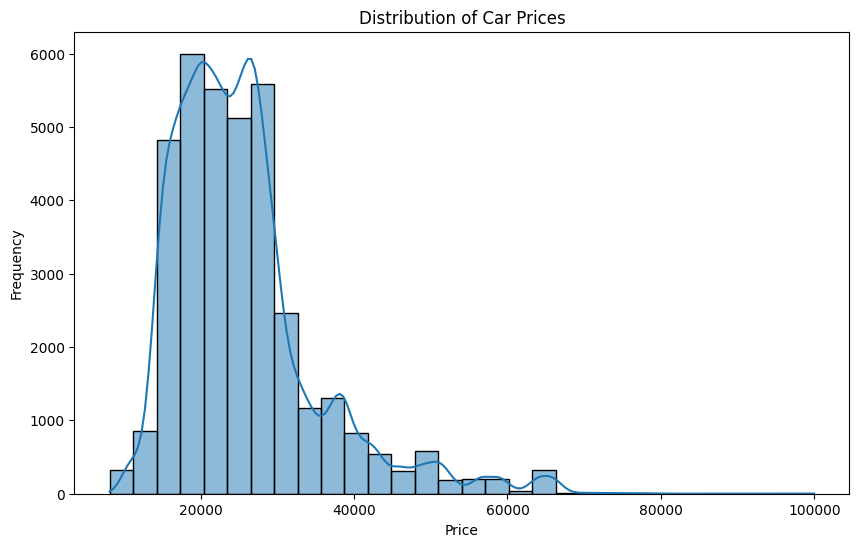

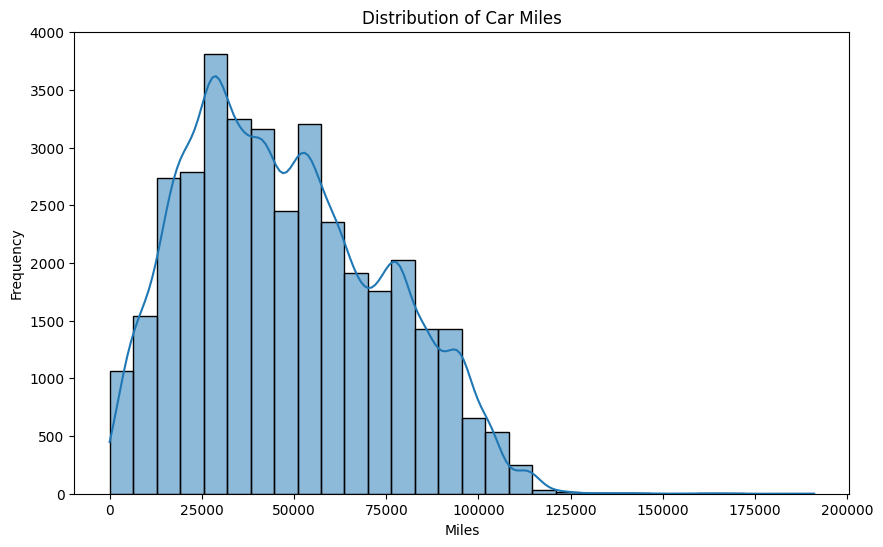

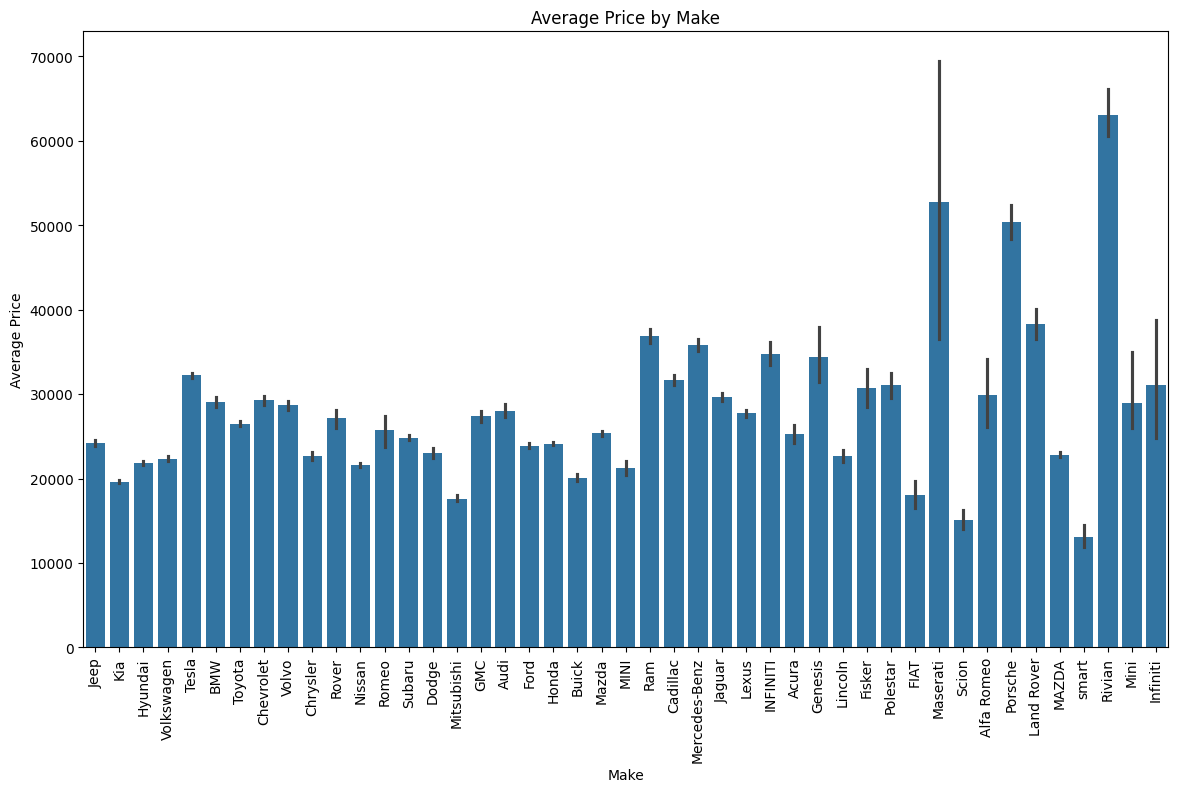

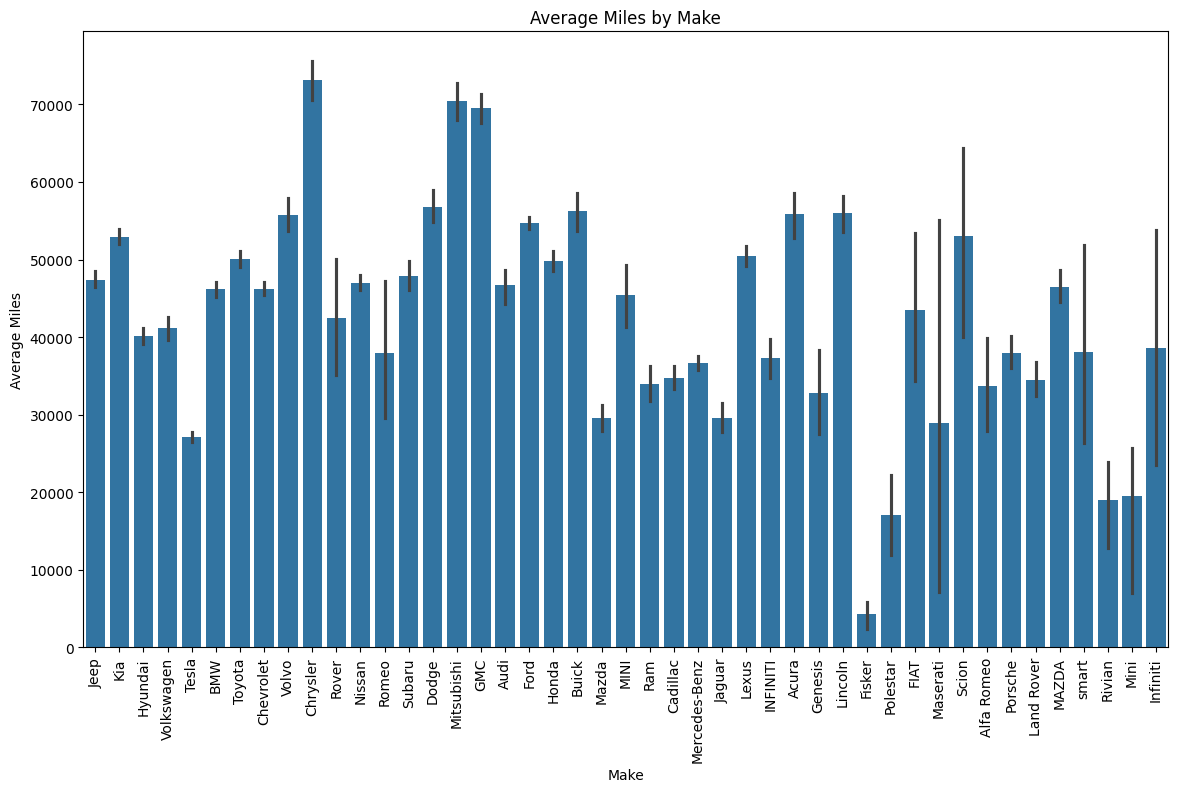

In [600]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data["Price"], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Distribution of miles
plt.figure(figsize=(10, 6))
sns.histplot(data["Miles"], bins=30, kde=True)
plt.title("Distribution of Car Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# Average price by make
plt.figure(figsize=(14, 8))
sns.barplot(x="Make", y="Price", data=data)
plt.xticks(rotation=90)
plt.title("Average Price by Make")
plt.xlabel("Make")
plt.ylabel("Average Price")
plt.show()

# Average miles by make
plt.figure(figsize=(14, 8))
sns.barplot(x="Make", y="Miles", data=data)
plt.xticks(rotation=90)
plt.title("Average Miles by Make")
plt.xlabel("Make")
plt.ylabel("Average Miles")
plt.show()

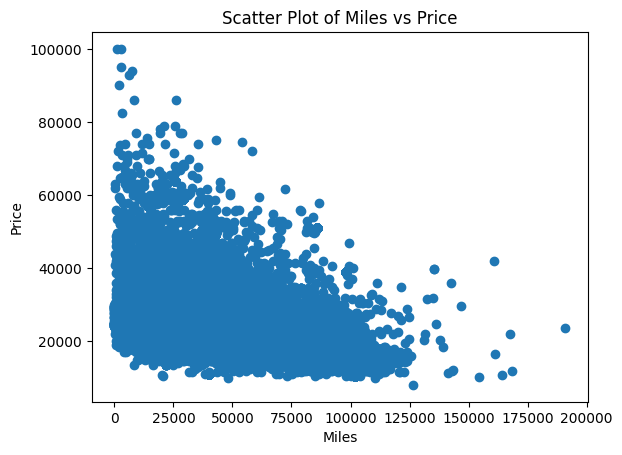

In [601]:
# Miles vs Price
plt.scatter(data["Miles"], data["Price"])
plt.title("Scatter Plot of Miles vs Price")
plt.xlabel("Miles")
plt.ylabel("Price")
plt.show()

In [602]:
# Normalize the features: Price, Miles, and Year
scaler = MinMaxScaler()

# Normalize Price and Miles (invert Price to prioritize lower prices)
data["Norm_Price"] = 1 - scaler.fit_transform(data[["Price"]])
data["Norm_Miles"] = 1 - scaler.fit_transform(data[["Miles"]])
data["Norm_Age"] = 1 - scaler.fit_transform(data[["Age"]])

In [603]:
# Assign weights
price_weight = 0.7
miles_weight = 0.25
year_weight = 0.05

# Calculate the composite score
data["Composite_Score"] = (
    data["Norm_Price"] * price_weight
    + data["Norm_Miles"] * miles_weight
    + data["Norm_Age"] * year_weight
)

In [604]:
# Rank the cars based on the composite score
data["Rank"] = data["Composite_Score"].rank(ascending=False)

# Sort the data by rank
data = data.sort_values(by="Rank")

# Display the ranked data
display(data)

,Year,Make,Model,Price,Miles,Source,Age,Norm_Price,Norm_Miles,Norm_Age,Composite_Score,Rank
5855,2021,Chevrolet,Spark 1LT CVT,10870.0,20000,Source.CAR_AND_DRIVER,3,0.970088,0.895311,0.800000,0.942889,1.0
2679,2024,Mitsubishi,Mirage LE Hatchback,15600.0,13000,Source.CAR_AND_DRIVER,0,0.918601,0.931962,1.000000,0.926011,2.0
35214,2021,Chevrolet,Malibu,14900.0,9638,Source.CARFAX,3,0.926220,0.949564,0.800000,0.925745,3.0
9551,2017,smart,fortwo electric drive Pure Hatchback Coupe 2D,13590.0,8483,Source.CARVANA,7,0.940480,0.955611,0.533333,0.923905,4.0
4698,2020,Nissan,LEAF SV,14950.0,10000,Source.CAR_AND_DRIVER,4,0.925676,0.947669,0.733333,0.921557,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15489,2023,BMW,7 Series 760i xDrive Sedan 4D,92990.0,6171,Source.CARVANA,1,0.076196,0.967716,0.933333,0.341933,36410.0
11695,2024,Land Rover,Defender 110 SE Sport Utility 4D,93990.0,7271,Source.CARVANA,0,0.065311,0.961957,1.000000,0.336207,36411.0
12205,2024,Porsche,718 Cayman S Coupe 2D,94990.0,2749,Source.CARVANA,0,0.054426,0.985633,1.000000,0.334506,36412.0
9485,2024,Lexus,LC LC 500 Convertible 2D,99990.0,951,Source.CARVANA,0,0.000000,0.995047,1.000000,0.298762,36413.0


In [605]:
# Use KMeans clustering to group the cars into 5 clusters
from sklearn.cluster import KMeans

# Select the features for clustering
X = data[["Price", "Miles", "Year"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Display the clustered data
display(data)

,Year,Make,Model,Price,Miles,Source,Age,Norm_Price,Norm_Miles,Norm_Age,Composite_Score,Rank,Cluster
5855,2021,Chevrolet,Spark 1LT CVT,10870.0,20000,Source.CAR_AND_DRIVER,3,0.970088,0.895311,0.800000,0.942889,1.0,4
2679,2024,Mitsubishi,Mirage LE Hatchback,15600.0,13000,Source.CAR_AND_DRIVER,0,0.918601,0.931962,1.000000,0.926011,2.0,4
35214,2021,Chevrolet,Malibu,14900.0,9638,Source.CARFAX,3,0.926220,0.949564,0.800000,0.925745,3.0,4
9551,2017,smart,fortwo electric drive Pure Hatchback Coupe 2D,13590.0,8483,Source.CARVANA,7,0.940480,0.955611,0.533333,0.923905,4.0,2
4698,2020,Nissan,LEAF SV,14950.0,10000,Source.CAR_AND_DRIVER,4,0.925676,0.947669,0.733333,0.921557,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15489,2023,BMW,7 Series 760i xDrive Sedan 4D,92990.0,6171,Source.CARVANA,1,0.076196,0.967716,0.933333,0.341933,36410.0,1
11695,2024,Land Rover,Defender 110 SE Sport Utility 4D,93990.0,7271,Source.CARVANA,0,0.065311,0.961957,1.000000,0.336207,36411.0,1
12205,2024,Porsche,718 Cayman S Coupe 2D,94990.0,2749,Source.CARVANA,0,0.054426,0.985633,1.000000,0.334506,36412.0,1
9485,2024,Lexus,LC LC 500 Convertible 2D,99990.0,951,Source.CARVANA,0,0.000000,0.995047,1.000000,0.298762,36413.0,1


In [606]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Miles", y="Price", hue="Cluster", data=data, palette="viridis")
plt.title("Clusters of Cars")
plt.xlabel("Miles")
plt.ylabel("Price")
plt.show()

In [ ]:
# Save the ranked data to a CSV file
data.to_csv("../data/ranked_combined_cars.csv", index=False)